**Importing the Libraries**

In [1]:
pip install scikit-plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

**Loading the dataset**

In [3]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data Preprocessing**

In [4]:
churn_data_1 = churn_data.copy()
churn_data_1.TotalCharges = pd.to_numeric(churn_data_1.TotalCharges, errors = 'coerce')
churn_data_1.dropna(how = 'any', inplace=True)
churn_data_1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
churn_data_1.drop(columns = ['customerID'], axis=1, inplace=True)
churn_data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
churn_data_1['PaymentMethod'] = churn_data_1['PaymentMethod'].str.replace('(automatic)','', regex=False)
churn_data_1.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

In [7]:
churn_data_1['Churn'] = np.where(churn_data_1.Churn == 'Yes', 1,0)
churn_data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [8]:
churn_data_1 = pd.get_dummies(churn_data_1)
churn_data_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [9]:
mms = StandardScaler()
churn_data_1[['MonthlyCharges', 'TotalCharges']] = mms.fit_transform(churn_data_1[['MonthlyCharges', 'TotalCharges']])
churn_data_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,-1.161694,-0.994194,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,-0.260878,-0.173740,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,-0.363923,-0.959649,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,-0.747850,-0.195248,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,0.196178,-0.940457,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [10]:
X1 = churn_data_1.drop(['Churn'], axis=1)
y1 = churn_data_1['Churn']
X1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,-1.161694,-0.994194,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,-0.260878,-0.173740,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,-0.363923,-0.959649,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,-0.747850,-0.195248,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,0.196178,-0.940457,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,0.664868,-0.129180,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,1.276493,2.241056,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,-1.170004,-0.854514,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,0.319168,-0.872095,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


**Baseline Model**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1, stratify=y1)

In [12]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train) 

[02:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(objective='reg:linear', random_state=42)

In [13]:
predictions_nb = xgb_model.predict(X_test)

In [14]:
print('\033[1m' + "Model Accuracy" + '\033[0m')
print("Accuracy of the model is:", accuracy_score(y_test, predictions_nb))
print("\n")
print('\033[1m' + "Confusion Matrix" + '\033[0m')
con_mat = pd.DataFrame(confusion_matrix(y_test, predictions_nb), index=['True[0]','True[1]'], 
                       columns=['Predict[0]', 'Predict[1]'])
print(con_mat)
print("\n")
print('\033[1m' + "Classification Report" + '\033[0m')
print(classification_report(y_test, predictions_nb))

Model Accuracy
Accuracy of the model is: 0.7931769722814499


Confusion Matrix
         Predict[0]  Predict[1]
True[0]         941          92
True[1]         199         175


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



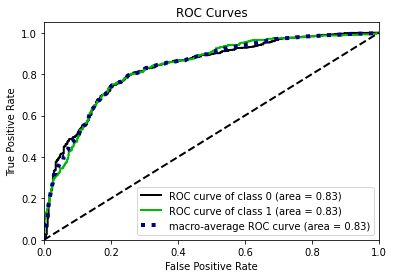

In [15]:
skplt.metrics.plot_roc(y_test, xgb_model.predict_proba(X_test), plot_micro=False)
plt.show()

**SMOTE Technique**

In [16]:
print('\033[1m' + "Distribution of Target Variable Churn before Upsampling" + '\033[0m')
print(churn_data_1['Churn'].value_counts())
print("\n")

Distribution of Target Variable Churn before Upsampling
0    5163
1    1869
Name: Churn, dtype: int64




In [17]:
X_os = churn_data_1.loc[:, churn_data_1.columns != 'Churn']
y_os = churn_data_1.loc[:, churn_data_1.columns == 'Churn']

In [18]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
Xos_train, Xos_test, yos_train, yos_test = train_test_split(X_os, y_os, test_size=0.3, random_state=0)
columns = Xos_train.columns

In [19]:
os_data_X,os_data_y=os.fit_resample(Xos_train, yos_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

In [20]:
# Checking the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
print("Number of NO churn in oversampled data:",len(os_data_y[os_data_y['Churn']==0]))
print("Number of churn:",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of NO churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

Length of oversampled data is  7216
Number of NO churn in oversampled data: 3608
Number of churn: 3608
Proportion of NO churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


In [21]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
xgb_2 = xgb.XGBClassifier(objective="reg:linear", random_state=42)
xgb_2.fit(X_train, y_train)

xgb_pred = xgb_2.predict(X_test)
print('\033[1m' + "Model Accuracy" + '\033[0m')
print("Accuracy of the model is:", accuracy_score(y_test, xgb_pred))
print("\n")
print('\033[1m' + "Confusion Matrix" + '\033[0m')
con_mat = pd.DataFrame(confusion_matrix(y_test, xgb_pred), index=['True[0]','True[1]'], 
                       columns=['Predict[0]', 'Predict[1]'])
print(con_mat)
print("\n")
print('\033[1m' + "Classification Report" + '\033[0m')
print(classification_report(y_test, xgb_pred))

[02:44:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Accuracy
Accuracy of the model is: 0.8595842956120092


Confusion Matrix
         Predict[0]  Predict[1]
True[0]         892         172
True[1]         132         969


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1064
           1       0.85      0.88      0.86      1101

    accuracy                           0.86      2165
   macro avg       0.86      0.86      0.86      2165
weighted avg       0.86      0.86      0.86      2165



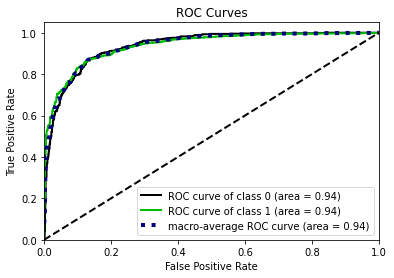

In [22]:
skplt.metrics.plot_roc(y_test, xgb_2.predict_proba(X_test), plot_micro=False)
plt.show()

**Feature Selection**

In [23]:
df_final_vars=churn_data_1.columns.values.tolist()
y=['Churn']
X=[i for i in df_final_vars if i not in y]

In [24]:
from sklearn.feature_selection import RFE

xgb_clf = xgb.XGBClassifier();
rfe = RFE(xgb_clf, step=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)

[False  True  True False False  True False False  True  True False False
  True False False False  True  True  True False  True  True False False
 False False False  True False  True False False False False False  True
  True  True  True  True  True  True  True False  True]


In [25]:
ranking = rfe.support_
df_r = pd.DataFrame(ranking)
df_x = churn_data_1.copy()
df_x.drop(['Churn'], axis=1, inplace=True)
columns_x = df_x.columns.values
df_col = pd.DataFrame(columns_x)
df_ranking = df_col.merge(df_r, left_index=True, right_index=True, how='inner')
df_features = df_ranking.loc[df_ranking['0_y'] == True]
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 1 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0_x     22 non-null     object
 1   0_y     22 non-null     bool  
dtypes: bool(1), object(1)
memory usage: 374.0+ bytes


In [26]:
first_column = df_features.iloc[:, 0]
cols=first_column.to_list()
cols

['tenure',
 'MonthlyCharges',
 'gender_Male',
 'Dependents_No',
 'Dependents_Yes',
 'MultipleLines_No',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'TechSupport_No',
 'TechSupport_Yes',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer ',
 'PaymentMethod_Credit card ',
 'PaymentMethod_Mailed check']

In [27]:
X=os_data_X[cols]
y=os_data_y["Churn"]

In [28]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.445080
         Iterations 7
                               Results: Logit
Model:                   Logit                Pseudo R-squared:     0.358    
Dependent Variable:      Churn                AIC:                  6467.3933
Date:                    2022-05-22 02:44     BIC:                  6618.8425
No. Observations:        7216                 Log-Likelihood:       -3211.7  
Df Model:                21                   LL-Null:              -5001.8  
Df Residuals:            7194                 LLR p-value:          0.0000   
Converged:               1.0000               Scale:                1.0000   
No. Iterations:          7.0000                                              
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------

In [29]:
cols_remove=["Dependents_No","gender_Male","OnlineSecurity_No","InternetService_No","TechSupport_No","Contract_One year","PaperlessBilling_Yes"]
cols_new =[]
for i in cols:
  if i not in cols_remove:
    cols_new.append(i)

In [30]:
X=os_data_X[cols_new]
y=os_data_y["Churn"]

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.445328
         Iterations 7
                               Results: Logit
Model:                   Logit                Pseudo R-squared:     0.358    
Dependent Variable:      Churn                AIC:                  6456.9776
Date:                    2022-05-22 02:44     BIC:                  6560.2384
No. Observations:        7216                 Log-Likelihood:       -3213.5  
Df Model:                14                   LL-Null:              -5001.8  
Df Residuals:            7201                 LLR p-value:          0.0000   
Converged:               1.0000               Scale:                1.0000   
No. Iterations:          7.0000                                              
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------

**Model developed with Hyperparameter Tuning**

In [31]:
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

print(param_grid)


{'silent': [False], 'max_depth': [6, 10, 15, 20], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0, 3], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], 'gamma': [0, 0.25, 0.5, 1.0], 'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], 'n_estimators': [100]}


In [32]:
clf_xgb = xgb.XGBClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rf_RandomGrid = RandomizedSearchCV(estimator = clf_xgb, param_distributions = param_grid, cv = cv, verbose=2, n_jobs = 4)

rf_RandomGrid.fit(X, y)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=XGBClassifier(), n_jobs=4,
                   param_distributions={'colsample_bylevel': [0.4, 0.5, 0.6,
                                                              0.7, 0.8, 0.9,
                                                              1.0],
                                        'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0, 3],
                                        'max_depth': [6, 10, 15, 20],
                                        'min_child_weight': [0.5, 1.0, 3.0, 5.0,
                                                             7.0, 10.0],
                                   

In [33]:
rf_RandomGrid.best_params_

{'colsample_bylevel': 0.7,
 'colsample_bytree': 0.8,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 20,
 'min_child_weight': 3.0,
 'n_estimators': 100,
 'reg_lambda': 0.1,
 'silent': False,
 'subsample': 0.7}

**Final Model**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
xgb_final = xgb.XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.1, gamma=0.25,
                              learning_rate=0.1, max_depth=10, min_child_weight=3.0,
                              n_estimators=100, reg_lambda=5.0, silent=False, subsample=1.0)
xgb_final.fit(X_train, y_train)
xgb_predictions = xgb_final.predict(X_test)
print('\033[1m' + "Model Accuracy" + '\033[0m')
print("Accuracy of the model is:", (accuracy_score(y_test, xgb_predictions)*100))
print("\n")
print('\033[1m' + "Confusion Matrix" + '\033[0m')
con_mat = pd.DataFrame(confusion_matrix(y_test, xgb_predictions), index=['True[0]','True[1]'], 
                       columns=['Predict[0]', 'Predict[1]'])
print(con_mat)
print("\n")
print('\033[1m' + "Classification Report" + '\033[0m')
print(classification_report(y_test, xgb_predictions))

Model Accuracy
Accuracy of the model is: 79.67667436489607


Confusion Matrix
         Predict[0]  Predict[1]
True[0]         811         253
True[1]         187         914


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      1064
           1       0.78      0.83      0.81      1101

    accuracy                           0.80      2165
   macro avg       0.80      0.80      0.80      2165
weighted avg       0.80      0.80      0.80      2165



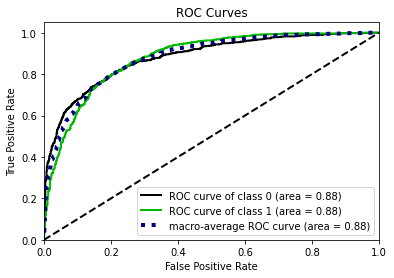

In [35]:
skplt.metrics.plot_roc(y_test, xgb_final.predict_proba(X_test), plot_micro=False)
plt.show()